# QUESTION 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [2]:
# PREPARING DATA FOR TANH FUNCTION

tan_X1 = [-1.0,-1.0,1.0,1.0]
tan_X2 = [-1.0,1.0,-1.0,1.0]
tan_y = [-1,1,1,-1]

tan_dic = {"X1":tan_X1,
           "X2":tan_X2,
           "Y":tan_y}

tan_df = pd.DataFrame(tan_dic)
tan_df

,X1,X2,Y
0,-1.0,-1.0,-1
1,-1.0,1.0,1
2,1.0,-1.0,1
3,1.0,1.0,-1


In [3]:
# PREPARING DATA FOR SIGMOID FUNCTION

sig_X1 = [0,0,1,1]
sig_X2 = [0,1,0,1]
sig_y = [0,1,1,0]

sig_dic = {"X1":sig_X1,
           "X2":sig_X2,
           "Y":sig_y}

sig_df = pd.DataFrame(sig_dic)
sig_df

,X1,X2,Y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


## TANH PART

NameError: name 'np' is not defined

In [4]:
# INITIALIZING PARAMETERS FOR TANH FUNCTION
def initialize_parameters_tanh():
    parameters = {
                  "weight1": np.array([[1.0,1.0],[1.0,1.0]]),                
                  "bias1": np.array([0.5,-0.7]),
                  "weight2": np.array([0.5,-0.4]),
                  "bias2" : np.array([-0.3]) 
                    }
                       
    
    return parameters

In [5]:
parameters_tanh = initialize_parameters_tanh()

In [6]:
X_tan = tan_df.drop("Y",axis = 1)
Y_tan = tan_df["Y"]

In [7]:
def quantize_tanh(result): #quantization of tanh function
    
    if result[0] < 0:
        return -1
    
    return 1

In [8]:
def tanh_forward_propagation(X_tan,Y_tan): # This function shows our data's solution by using tanh function
     
    for i in range(X_tan.shape[0]):
        X_column = X_tan.to_numpy()[i,:].reshape((X_tan.shape[1],1)) # arranging of X vector
        
        # output of first neuron in hidden layer by using weights and tanh function
        neuron_1 = np.tanh(parameters_tanh["bias1"][0] + np.dot(parameters_tanh["weight1"][0],X_column))
       
        # output of second neuron in hidden layer by using weights and tanh function
        neuron_2 = np.tanh(parameters_tanh["bias1"][1] + np.dot(parameters_tanh["weight1"][1],X_column)) 
        
        # output of output neuron by using weights and tanh function
        y_pred = np.tanh(parameters_tanh["bias2"] + np.dot(parameters_tanh["weight2"][0],neuron_1) + np.dot(parameters_tanh["weight2"][1],neuron_2))
        
        # quantizing of results
        quantized_n1 = quantize_tanh(neuron_1)
        quantized_n2 = quantize_tanh(neuron_2)
        quantized_output = quantize_tanh(y_pred)
        
        print(str(i+1) + ".data:" + "  Result of first neuron in hidden layer:" + str(quantized_n1) + "  Result of second neuron in hidden layer:"
              +str(quantized_n2) + "  Output (Last neuron):" + str(quantized_output) + "  Actual Data:" + str(Y_tan[i]))

In [9]:
tanh_forward_propagation(X_tan,Y_tan)

1.data:  Result of first neuron in hidden layer:-1  Result of second neuron in hidden layer:-1  Output (Last neuron):-1  Actual Data:-1
2.data:  Result of first neuron in hidden layer:1  Result of second neuron in hidden layer:-1  Output (Last neuron):1  Actual Data:1
3.data:  Result of first neuron in hidden layer:1  Result of second neuron in hidden layer:-1  Output (Last neuron):1  Actual Data:1
4.data:  Result of first neuron in hidden layer:1  Result of second neuron in hidden layer:1  Output (Last neuron):-1  Actual Data:-1


In [10]:
def tanh_forward_propagation_data(X_tan,X1,X2): # This function returns all neurons outputs by using given data
       
    X_column = np.concatenate([[X1],[X2]],axis = 0).reshape((X_tan.shape[1],1)) # arranging of X vector

    neuron_1 = np.tanh(parameters_tanh["bias1"][0] + np.dot(parameters_tanh["weight1"][0],X_column)) 
    neuron_2 = np.tanh(parameters_tanh["bias1"][1] + np.dot(parameters_tanh["weight1"][1],X_column))
    y_pred = np.tanh(parameters_tanh["bias2"] + np.dot(parameters_tanh["weight2"][0],neuron_1) + np.dot(parameters_tanh["weight2"][1],neuron_2))
    
    quantized_n1_tanh = quantize_tanh(neuron_1)
    quantized_n2_tanh = quantize_tanh(neuron_2)
    quantized_output_tanh = quantize_tanh(y_pred)
    
    return quantized_n1_tanh,quantized_n2_tanh,quantized_output_tanh


In [11]:
def draw_network_graph(parameters_tanh):
    
    #getting parameters
    w1_1 = parameters_tanh["weight1"][0][0]
    w2_1 = parameters_tanh["weight1"][0][1]
    
    w1_2 = parameters_tanh["weight1"][1][0]
    w2_2 = parameters_tanh["weight1"][1][1]
    
    w2_4 = parameters_tanh["weight2"][0]
    w3_4 = parameters_tanh["weight2"][1]

    bias1_1 = parameters_tanh["bias1"][0]
    bias1_2 = parameters_tanh["bias1"][1]
    
    bias2 = parameters_tanh["bias2"][0]
    
    plt.figure(figsize=(15,8))
    ax = plt.gca()

    ax.set_title('NETWORK GRAPH WITH WEIGHTS(TANH)',color="y",fontsize=30)
    g = nx.DiGraph()

    g.add_node("Bias",pos=(0.5,2)) 
    g.add_node("Node 1",pos=(0,0))
    g.add_node("Node 2",pos=(0,1))
    g.add_node("Hidden Layer 1",pos=(1,0.5))
    g.add_node("Hidden Layer 2",pos=(1,1))
    g.add_node("Output",pos=(3,1.5))

    g.add_edge("Node 1", "Hidden Layer 1",color='g',weight = w1_1)
    g.add_edge("Node 1", "Hidden Layer 2",color='g',weight = w1_2)
    g.add_edge("Node 2", "Hidden Layer 1",color="g",weight = w2_1)
    g.add_edge("Node 2", "Hidden Layer 2",color="g",weight = w2_2)
    g.add_edge("Hidden Layer 1", "Output",color="black",weight = w2_4)
    g.add_edge("Hidden Layer 2","Output",color="black",weight = w3_4)
    g.add_edge("Bias", "Hidden Layer 1",color='r',weight = bias1_1)
    g.add_edge("Bias", "Hidden Layer 2",color='r',weight= bias1_2)
    g.add_edge("Bias", "Output",color='r',weight= bias2)

    pos=nx.get_node_attributes(g,'pos')
    edge_labels = dict()
    edges = g.edges()
    colors = [g[u][v]['color'] for u,v in edges]

    labels = nx.get_edge_attributes(g,'weight')

    nx.draw(g, with_labels=True,node_size=3000, font_weight='bold',edge_color=colors,pos=pos,node_color = "y")

    nx.draw_networkx_edge_labels(g,edge_labels=labels,pos=pos)
    plt.show()

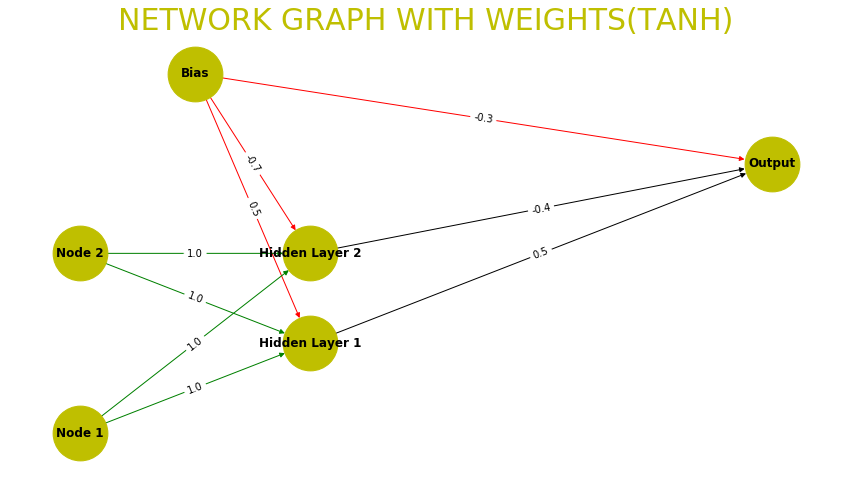

In [12]:
draw_network_graph(parameters_tanh)

### SIGMOID PART

In [13]:
X_sigmoid = sig_df.drop("Y",axis = 1)
Y_sigmoid = sig_df["Y"]

In [14]:
# INITIALIZING PARAMETERS FOR SIGMOID FUNCTION
def initialize_parameters_sigmoid():
    parameters = {
                  "weight1": np.array([[20,20],[-20,-20]]),                
                  "bias1": np.array([-10,30]),
                  "weight2": np.array([20,20]),
                  "bias2" : np.array([-30]) 
                    }
                       
    
    return parameters

In [15]:
parameters_sigmoid = initialize_parameters_sigmoid()

In [16]:
#sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [17]:
#quantization of sigmoid function
def quantize_sigmoid(result):
    
    if result < 0.5:
        return 0
    
    return 1

In [18]:
def sigmoid_forward_propagation(X_sigmoid,Y_sigmoid): # This function shows our data's solution by using sigmoid function
     
    for i in range(X_sigmoid.shape[0]):
        X_column = X_sigmoid.to_numpy()[i,:].reshape((X_sigmoid.shape[1],1)) #arranging of X vector
        
        #output of first neuron in hidden layer by using weights and sigmoid function
        neuron_1 = sigmoid(parameters_sigmoid["bias1"][0] + np.dot(parameters_sigmoid["weight1"][0],X_column))
        
        #output of second neuron in hidden layer by using weights and sigmoid function
        neuron_2 = sigmoid(parameters_sigmoid["bias1"][1] + np.dot(parameters_sigmoid["weight1"][1],X_column))
        
        # output of second neuron in hidden layer by using weights and sigmoid function
        y_pred = sigmoid((parameters_sigmoid["bias2"] + np.dot(parameters_sigmoid["weight2"][0],neuron_1) + np.dot(parameters_sigmoid["weight2"][1],neuron_2)))
        
        quantized_n1  =  quantize_sigmoid(neuron_1)
        quantized_n2  =  quantize_sigmoid(neuron_2)
        quantized_output  =  quantize_sigmoid(y_pred)
        
        print(str(i+1) + ".data:" + "  Result of first neuron in hidden layer:" + str(quantized_n1) + "  Result of second neuron in hidden layer:"
              +str(quantized_n2) + "  Output (Last neuron):" + str(quantized_output) + "  Actual Data:" + str(Y_sigmoid[i]))

In [19]:
sigmoid_forward_propagation(X_sigmoid,Y_sigmoid)

1.data:  Result of first neuron in hidden layer:0  Result of second neuron in hidden layer:1  Output (Last neuron):0  Actual Data:0
2.data:  Result of first neuron in hidden layer:1  Result of second neuron in hidden layer:1  Output (Last neuron):1  Actual Data:1
3.data:  Result of first neuron in hidden layer:1  Result of second neuron in hidden layer:1  Output (Last neuron):1  Actual Data:1
4.data:  Result of first neuron in hidden layer:1  Result of second neuron in hidden layer:0  Output (Last neuron):0  Actual Data:0


In [20]:
def sigmoid_forward_propagation_data(X_sigmoid,X1,X2): # This function returns all neurons outputs by using given data
       
    X_column = np.concatenate([[X1],[X2]],axis = 0).reshape((X_tan.shape[1],1)) 
    
    neuron_1 = sigmoid(parameters_sigmoid["bias1"][0] + np.dot(parameters_sigmoid["weight1"][0],X_column))
    neuron_2 = sigmoid(parameters_sigmoid["bias1"][1] + np.dot(parameters_sigmoid["weight1"][1],X_column))
    y_pred = sigmoid(parameters_sigmoid["bias2"] + np.dot(parameters_sigmoid["weight2"][0],neuron_1) + np.dot(parameters_sigmoid["weight2"][1],neuron_2))
    
    quantized_n1_sigmoid = quantize_sigmoid(neuron_1)
    quantized_n2_sigmoid = quantize_sigmoid(neuron_2)
    quantized_output_sigmoid = quantize_sigmoid(y_pred)
    
    return quantized_n1_sigmoid,quantized_n2_sigmoid,quantized_output_sigmoid

In [21]:
#drawing network graph
def draw_network_graph(parameters_sigmoid):
    
    #getting parameters
    w1_1 = parameters_sigmoid["weight1"][0][0]
    w2_1 = parameters_sigmoid["weight1"][0][1]
    
    w1_2 = parameters_sigmoid["weight1"][1][0]
    w2_2 = parameters_sigmoid["weight1"][1][1]
    
    w2_4 = parameters_sigmoid["weight2"][0]
    w3_4 = parameters_sigmoid["weight2"][1]

    bias1_1 = parameters_sigmoid["bias1"][0]
    bias1_2 = parameters_sigmoid["bias1"][1]
    
    bias2 = parameters_sigmoid["bias2"][0]
    
    plt.figure(figsize=(15,8))
    ax = plt.gca()

    g = nx.DiGraph()

    g.add_node("Bias",pos=(0.5,2)) 
    g.add_node("Node 1",pos=(0,0))
    g.add_node("Node 2",pos=(0,1))
    g.add_node("Hidden Layer 1",pos=(1,0.5))
    g.add_node("Hidden Layer 2",pos=(1,1))
    g.add_node("Output",pos=(3,1.5))

    g.add_edge("Node 1", "Hidden Layer 1",color='g',weight = w1_1)
    g.add_edge("Node 1", "Hidden Layer 2",color='g',weight = w1_2)
    g.add_edge("Node 2", "Hidden Layer 1",color="g",weight = w2_1)
    g.add_edge("Node 2", "Hidden Layer 2",color="g",weight = w2_2)
    g.add_edge("Hidden Layer 1", "Output",color="black",weight = w2_4)
    g.add_edge("Hidden Layer 2","Output",color="black",weight = w3_4)
    g.add_edge("Bias", "Hidden Layer 1",color='r',weight = bias1_1)
    g.add_edge("Bias", "Hidden Layer 2",color='r',weight= bias1_2)
    g.add_edge("Bias", "Output",color='r',weight= bias2)
    
    ax.set_title('NETWORK GRAPH WITH WEIGHTS(SIGMOID)',color="y",fontsize=30)

    pos=nx.get_node_attributes(g,'pos')
    edge_labels = dict()
    edges = g.edges()
    colors = [g[u][v]['color'] for u,v in edges]

    labels = nx.get_edge_attributes(g,'weight')

    nx.draw(g, with_labels=True,node_size=3000, font_weight='bold',edge_color=colors,pos=pos,node_color = "y")

    nx.draw_networkx_edge_labels(g,edge_labels=labels,pos=pos)
    plt.show()

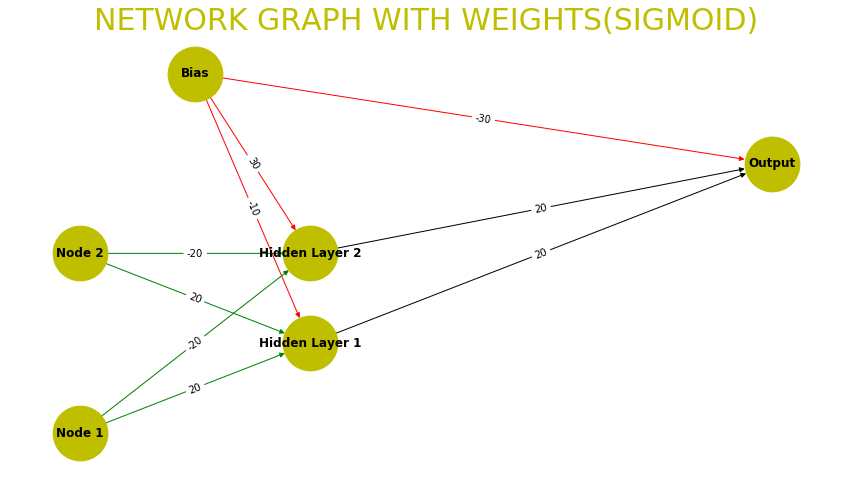

In [22]:
draw_network_graph(parameters_sigmoid)

# QUESTION 2

### TANH PART

In [23]:
#getting results for each neuron by given datas
def get_tanh_values(X1_tan_params,X2_tan_params):
    
    result_neuron1 = []
    result_neuron2 = []
    output = []
    
    for i,j in list(zip(X1_tan_params,X2_tan_params)):
        
        result1,result2,y_hat = tanh_forward_propagation_data(X_tan,i,j)
        result_neuron1.append(result1)
        result_neuron2.append(result2)
        output.append(y_hat)
        
    return result_neuron1,result_neuron2,output    


In [24]:
def draw_tanh(X1_tan_params,X2_tan_params,tan_list,neuron_name):
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    fig.set_figheight(8)
    fig.set_figwidth(15)

    X, Y = np.meshgrid(X1_tan_params, X2_tan_params)

    Z = np.array(tan_list).reshape((-1,1))

    surf = ax.plot_surface(X, Y, Z, color = "yellow",
                           linewidth=25, antialiased = False,shade = True)

    ax.zaxis.set_major_locator(LinearLocator(10))

    fig.colorbar(surf, shrink=0.9, aspect=15,cmap = "cool")
    
    plt.suptitle("DECISION SURFACE OF " + str(neuron_name) + " NEURON FOR TANH FUNCTION",fontsize = 26,color = "y")

    plt.show()
    
    return plt

In [25]:
#datas what will be sent
X1_tan_params = np.arange(-1,1,0.01)
X2_tan_params = np.arange(-1,1,0.01)

tan_neuron1_list, tan_neuron2_list, tan_y_head_list = get_tanh_values(X1_tan_params,X2_tan_params)

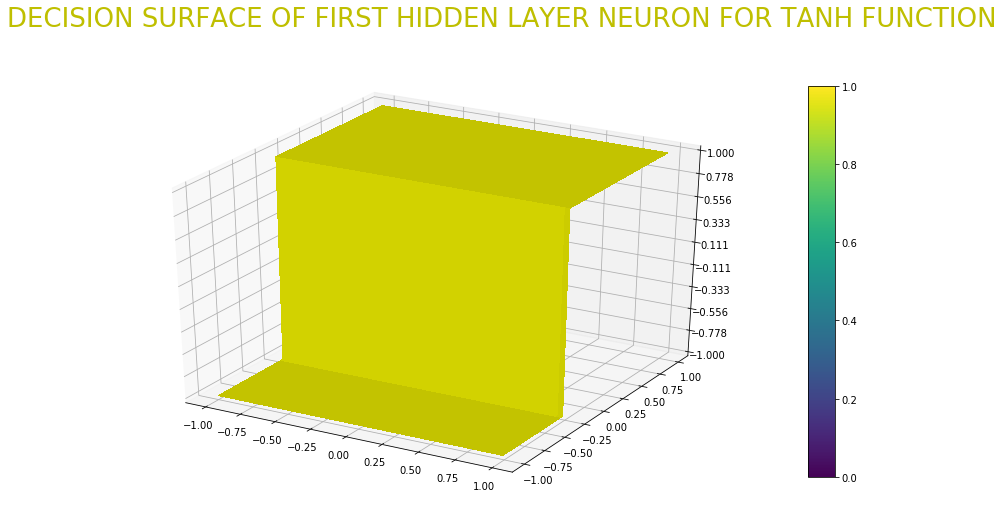

In [26]:
draw_tanh(X1_tan_params,X2_tan_params,tan_neuron1_list,"FIRST HIDDEN LAYER");

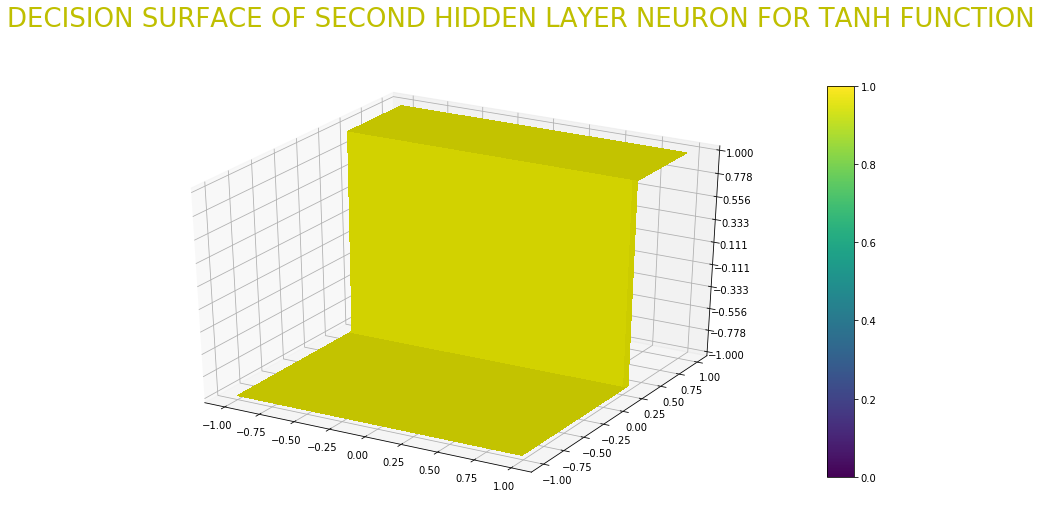

In [27]:
draw_tanh(X1_tan_params,X2_tan_params,tan_neuron2_list,"SECOND HIDDEN LAYER");

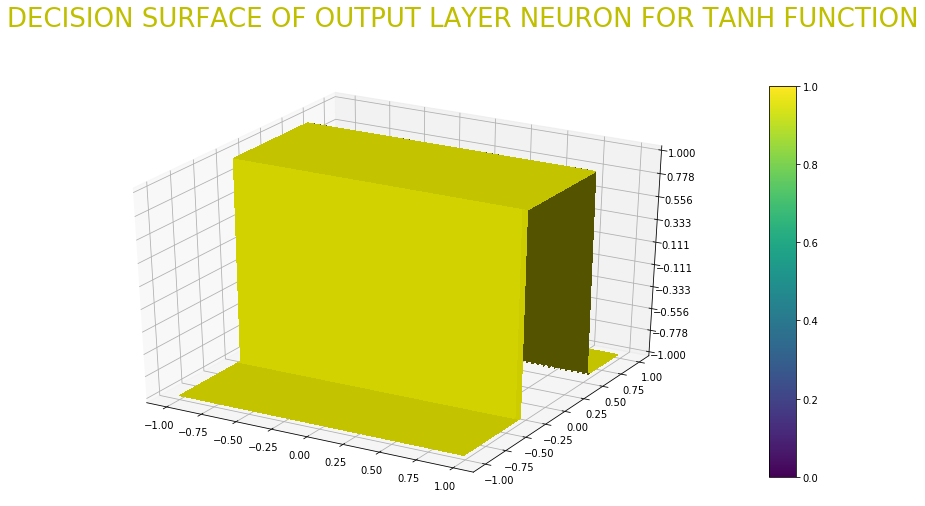

In [28]:
draw_tanh(X1_tan_params,X2_tan_params,tan_y_head_list,"OUTPUT LAYER");

### SIGMOID PART

In [29]:
#getting results for each neuron by given datas
def get_sigmoid_values(X1_sigmoid_params,X2_sigmoid_params):
    
    result_neuron1 = []
    result_neuron2 = []
    output = []
    
    for i,j in list(zip(X1_sigmoid_params,X2_sigmoid_params)):
        
        result1,result2,y_hat = sigmoid_forward_propagation_data(X_tan,i,j)
        result_neuron1.append(result1)
        result_neuron2.append(result2)
        output.append(y_hat)
        
    return result_neuron1,result_neuron2,output

In [30]:
def draw_sigmoid(X1_sig_params,X2_sig_params,sigmoid_list_neuron,neuron_name):
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    fig.set_figheight(8)
    fig.set_figwidth(15)

    plt.suptitle("DECISION SURFACE OF FIRST HIDDEN LAYER NEURON FOR SIGMOID FUNCTION",fontsize = 26,color = "y")

    X, Y = np.meshgrid(X1_sig_params, X2_sig_params)

    Z = np.array(sigmoid_list_neuron).reshape((-1,1))

    surf = ax.plot_surface(X, Y, Z, color = "yellow",
                           linewidth=25, antialiased=False,shade = True)

    ax.zaxis.set_major_locator(LinearLocator(10))

    fig.colorbar(surf, shrink=0.9, aspect=15)

    plt.show()

In [31]:
#datas what will be sent
X1_sig_params = np.arange(-1,1,0.01)
X2_sig_params = np.arange(-1,1,0.01)

sig_neuron1_list, sig_neuron2_list, sig_y_head_list = get_sigmoid_values(X1_tan_params,X2_tan_params)

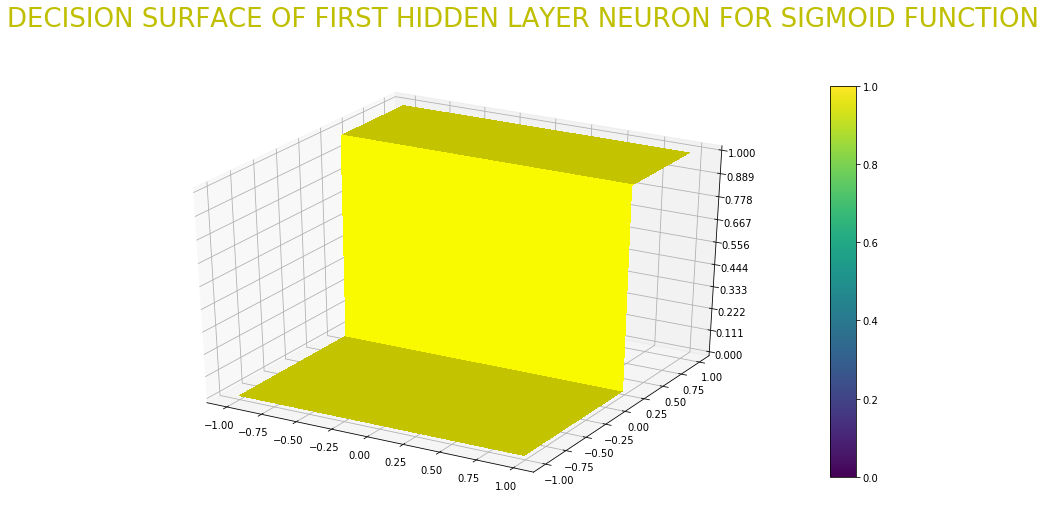

In [32]:
draw_sigmoid(X1_sig_params,X2_sig_params,sig_neuron1_list,"FIRST HIDDEN LAYER");

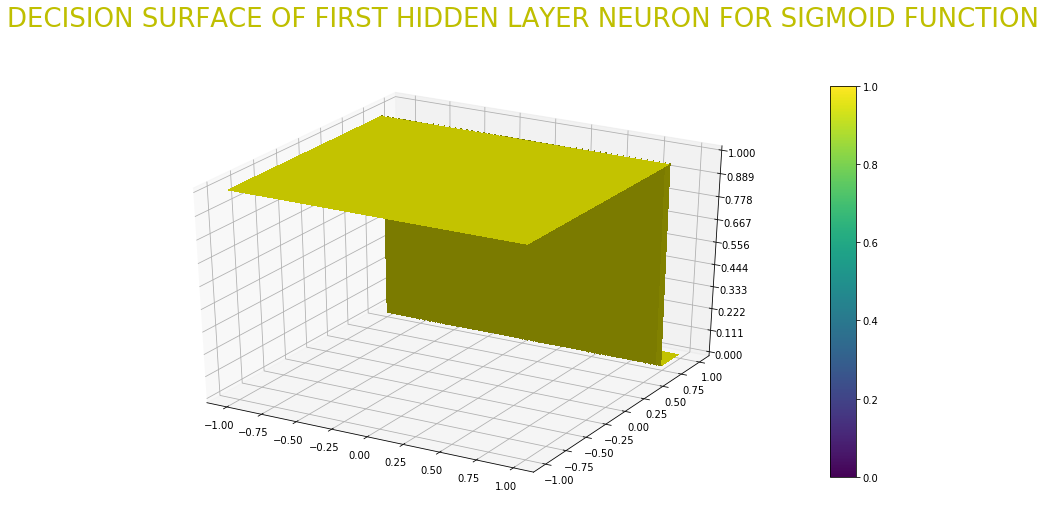

In [33]:
draw_sigmoid(X1_sig_params,X2_sig_params,sig_neuron2_list,"SECOND HIDDEN LAYER");

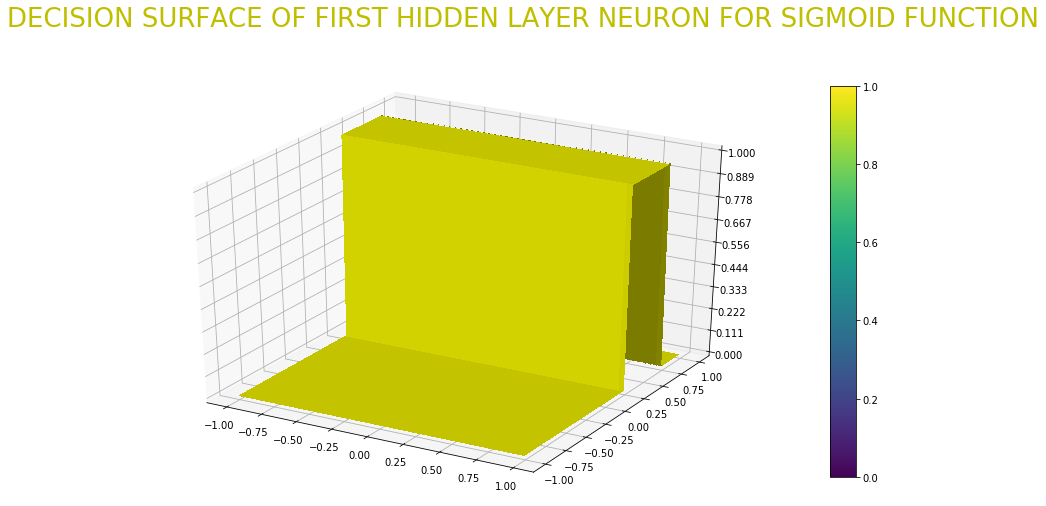

In [34]:
draw_sigmoid(X1_sig_params,X2_sig_params,sig_y_head_list,"OUTPUT LAYER");